# Zomato Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Zomato-data-.csv')
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### Data Cleaning and Preprocessing

In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### Checking for missing or null values to identify any data gaps

In [4]:
print(df.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


no null values in df

Text(0.5, 0, 'Type of Restaurant')

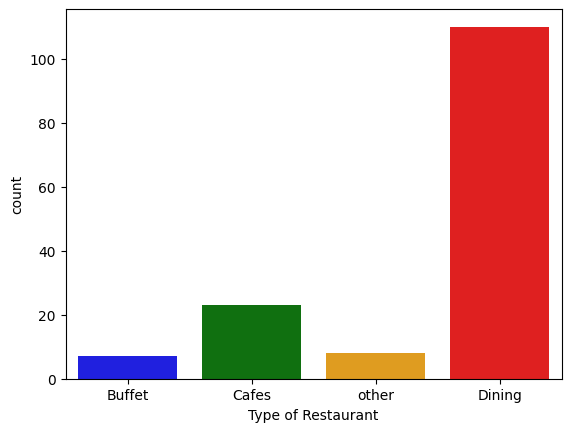

In [22]:
sns.countplot(x=df['listed_in(type)'], hue=df['listed_in(type)'], palette=['blue', 'green', 'orange', 'red'], legend=False)
plt.xlabel("Type of Restaurant")

Conclusion : The majority of restaurant fall into the dining category

### Votes by Restaurant Type

Text(0, 0.5, 'Votes')

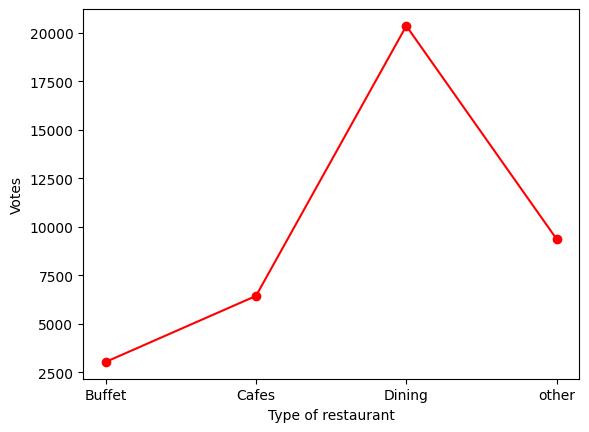

In [9]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c = 'red', marker = 'o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

Conclusion : Dining restaurants are preffered by a large number of individuals

### Identify the Most Voted Restaurant

In [10]:
max_votes = df['votes'].max()
restaurantwith_maxvotes= df.loc[df['votes']==max_votes, 'name']
print("Restaurant with max votes", restaurantwith_maxvotes)

Restaurant with max votes 38    Empire Restaurant
Name: name, dtype: object


### Online Order Availability

<Axes: xlabel='online_order', ylabel='count'>

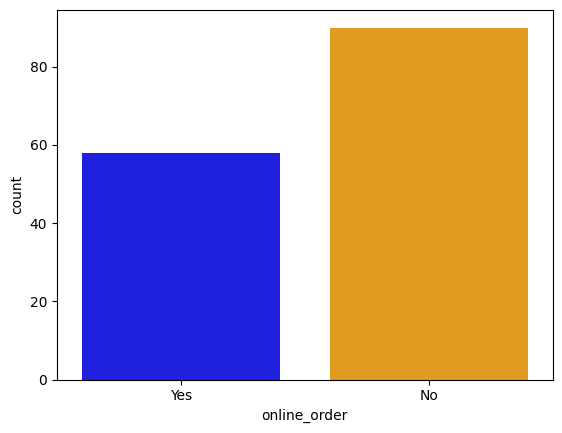

In [20]:
sns.countplot(x=df['online_order'], hue=df['online_order'], palette=['blue', 'orange'], legend=False)

### Analyzing Ratings

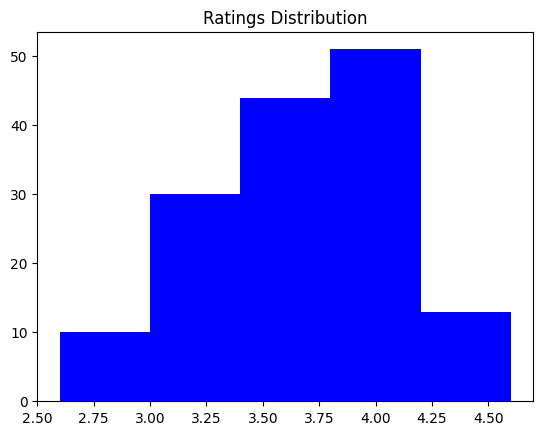

In [16]:
plt.hist(df['rate'], bins=5, color='blue')
plt.title('Ratings Distribution')
plt.show()

Majority of the restaurants have rating between 3.5 and 4.0

### Ratings Comparison - Onl vs Off Orders

<Axes: xlabel='online_order', ylabel='rate'>

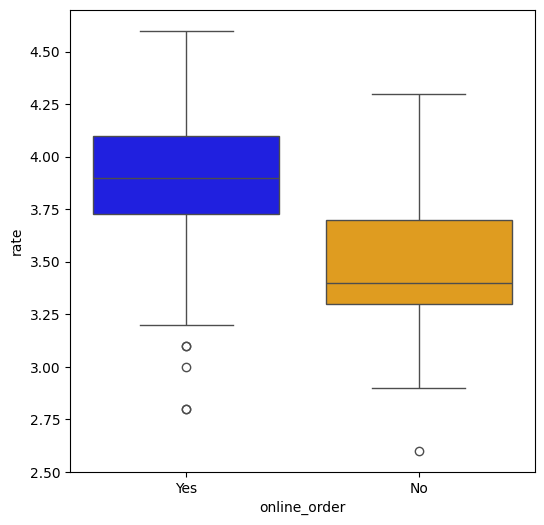

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df, hue='online_order', palette=['blue', 'orange'], legend=False)

### Order Mode Preferences by Restaurant Type

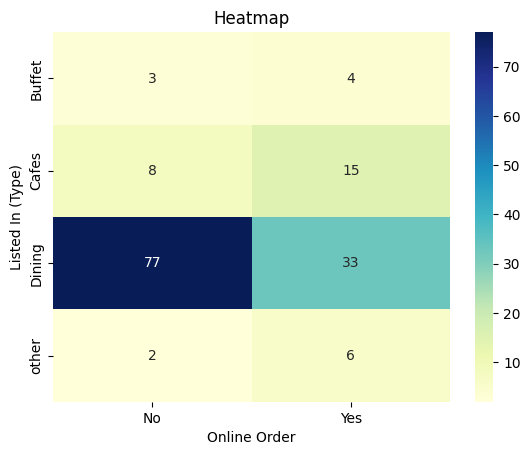

In [18]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

With this we can say that dining restaurants primarily accept offline orders whereas cafes primarily receive online orders.